In [37]:
import requests
import os
import urllib
import csv
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
merged_df = pd.read_csv("..\Final_Datasets\MergedTVandMovies.csv", dtype='unicode', encoding='utf8' )    

merged_df["IMDb"] = merged_df["IMDb"].astype(float)
merged_df["Netflix"] = merged_df["Netflix"].astype(float)
merged_df["Hulu"] = merged_df["Hulu"].astype(float)
merged_df["Prime Video"] = merged_df["Prime Video"].astype(float)
merged_df["Disney+"] = merged_df["Disney+"].astype(float)
merged_df["IMDb"] =round(merged_df["IMDb"])

merged_df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,movies,shows
0,0,Inception,2010,13+,9.0,87%,1.0,0.0,0.0,0.0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148,Movie,NaN
1,1,The Matrix,1999,18+,9.0,87%,1.0,0.0,0.0,0.0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136,Movie,NaN
2,2,Avengers: Infinity War,2018,13+,8.0,84%,1.0,0.0,0.0,0.0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149,Movie,NaN
3,3,Back to the Future,1985,7+,8.0,96%,1.0,0.0,0.0,0.0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116,Movie,NaN
4,4,"The Good, the Bad and the Ugly",1966,18+,9.0,97%,1.0,0.0,1.0,0.0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161,Movie,NaN


In [39]:
df1 = merged_df[["IMDb", "Netflix","Hulu", "Prime Video", "Disney+", "movies", "shows" ]]
df1.head()
print(f"Length of records in dataframe is {len(df1)}")

Length of records in dataframe is 22355


In [40]:
df1.head()

,IMDb,Netflix,Hulu,Prime Video,Disney+,movies,shows
0,9.0,1.0,0.0,0.0,0.0,Movie,NaN
1,9.0,1.0,0.0,0.0,0.0,Movie,NaN
2,8.0,1.0,0.0,0.0,0.0,Movie,NaN
3,8.0,1.0,0.0,0.0,0.0,Movie,NaN
4,9.0,1.0,0.0,1.0,0.0,Movie,NaN


In [41]:
df_netlfix = df1.loc[df1["Netflix"] ==1]
df_netlfix

,IMDb,Netflix,Hulu,Prime Video,Disney+,movies,shows
0,9.0,1.0,0.0,0.0,0.0,Movie,NaN
1,9.0,1.0,0.0,0.0,0.0,Movie,NaN
2,8.0,1.0,0.0,0.0,0.0,Movie,NaN
3,8.0,1.0,0.0,0.0,0.0,Movie,NaN
4,9.0,1.0,0.0,1.0,0.0,Movie,NaN
...,...,...,...,...,...,...,...
18670,NaN,1.0,0.0,0.0,0.0,NaN,TV
18671,NaN,1.0,0.0,0.0,0.0,NaN,TV
18672,NaN,1.0,0.0,0.0,0.0,NaN,TV
18673,NaN,1.0,0.0,0.0,0.0,NaN,TV


In [42]:
df_hulu = df1.loc[df1["Hulu"] ==1]
df_hulu

,IMDb,Netflix,Hulu,Prime Video,Disney+,movies,shows
67,8.0,1.0,1.0,0.0,0.0,Movie,NaN
97,8.0,1.0,1.0,0.0,0.0,Movie,NaN
146,7.0,1.0,1.0,0.0,0.0,Movie,NaN
148,8.0,1.0,1.0,1.0,0.0,Movie,NaN
214,7.0,1.0,1.0,0.0,0.0,Movie,NaN
...,...,...,...,...,...,...,...
20305,NaN,0.0,1.0,0.0,0.0,NaN,TV
20306,NaN,0.0,1.0,0.0,0.0,NaN,TV
20307,NaN,0.0,1.0,0.0,0.0,NaN,TV
20308,NaN,0.0,1.0,0.0,0.0,NaN,TV


In [43]:
df_prime = df1.loc[df1["Prime Video"] ==1]
df_prime

,IMDb,Netflix,Hulu,Prime Video,Disney+,movies,shows
4,9.0,1.0,0.0,1.0,0.0,Movie,NaN
6,8.0,1.0,0.0,1.0,0.0,Movie,NaN
11,8.0,1.0,0.0,1.0,0.0,Movie,NaN
15,8.0,1.0,0.0,1.0,0.0,Movie,NaN
31,8.0,1.0,0.0,1.0,0.0,Movie,NaN
...,...,...,...,...,...,...,...
22194,NaN,0.0,0.0,1.0,0.0,NaN,TV
22195,NaN,0.0,0.0,1.0,0.0,NaN,TV
22196,NaN,0.0,0.0,1.0,0.0,NaN,TV
22197,NaN,0.0,0.0,1.0,0.0,NaN,TV


In [44]:
df_disney = df1.loc[df1["Disney+"] ==1]
df_disney

,IMDb,Netflix,Hulu,Prime Video,Disney+,movies,shows
95,8.0,1.0,0.0,0.0,1.0,Movie,NaN
103,8.0,1.0,0.0,1.0,1.0,Movie,NaN
122,7.0,1.0,0.0,0.0,1.0,Movie,NaN
125,7.0,1.0,0.0,0.0,1.0,Movie,NaN
150,8.0,1.0,0.0,0.0,1.0,Movie,NaN
...,...,...,...,...,...,...,...
22350,NaN,0.0,0.0,0.0,1.0,NaN,TV
22351,NaN,0.0,0.0,0.0,1.0,NaN,TV
22352,NaN,0.0,0.0,0.0,1.0,NaN,TV
22353,NaN,0.0,0.0,0.0,1.0,NaN,TV


In [45]:
total_count = (len(df_netlfix) + len(df_hulu)  + len(df_prime)  + len(df_disney) )
total_count

23390

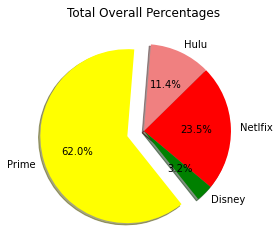

In [46]:
labels = ["Netlfix", "Hulu", "Prime", "Disney"]
sizes = [len(df_netlfix), len(df_hulu), len(df_prime), len(df_disney)]
colors = ["red", "lightcoral", "yellow", "green"]
explode = (0,0,.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle = 320)
plt.title ("Total Overall Percentages")
plt.savefig(r'../Final_Datasets/Piechart Total Overal Percentages.png')